In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

import xgboost as xgb

In [2]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
def notEmpty(s):
    return s != ''

In [4]:
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再按照每行数据进行处理
fd = pd.read_csv(path, header=None)
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):
    d = map(float, filter(notEmpty, d[0].split(' ')))
    data[i] = list(d)

x, y = np.split(data, (13,), axis=1)
y = y.ravel()

print ("样本数据量:%d, 特征个数：%d" % x.shape)
print ("target样本数据量:%d" % y.shape[0])

样本数据量:506, 特征个数：13
target样本数据量:506


In [5]:
#数据的分割，
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=14)
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：404, 测试数据集样本数目：102


In [6]:
# XGBoost将数据转换为XGBoost可用的数据类型
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

In [7]:
# XGBoost模型构建
# 1. 参数构建
params = {'max_depth':5, 'eta':1, 'objective':'reg:linear'}
# num_round：子模型数目
num_round = 500
# 2. 模型训练
bst = xgb.train(params, dtrain, num_round)
# 3. 模型保存
bst.save_model('xgb.model')

In [8]:
# 4. 加载模型
bst2 = xgb.Booster()
bst2.load_model('xgb.model')
# 5 使用加载模型预测
y_pred2 = bst2.predict(dtest)
print(mean_squared_error(y_test, y_pred2))
print(r2_score(y_test, y_pred2))

11.4263449617
0.821887383751


In [9]:
# XGBoost模型预测
y_pred = bst.predict(dtest)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

11.4263449617
0.821887383751


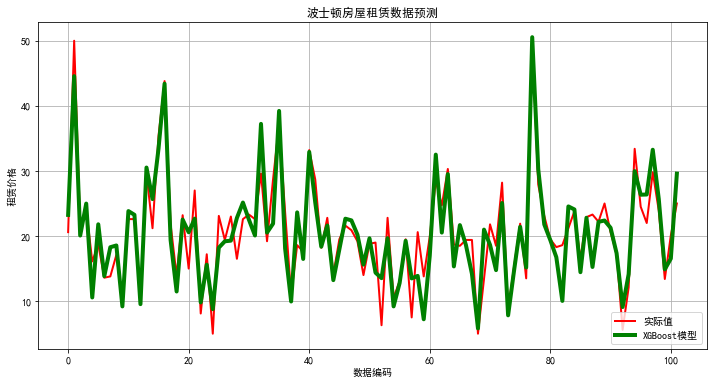

In [10]:
# 画图
## 7. 画图
plt.figure(figsize=(12,6), facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'实际值')
plt.plot(ln_x_test, y_pred, 'g-', lw=4, label=u'XGBoost模型')
plt.xlabel(u'数据编码')
plt.ylabel(u'租赁价格')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.title(u'波士顿房屋租赁数据预测')
plt.show()

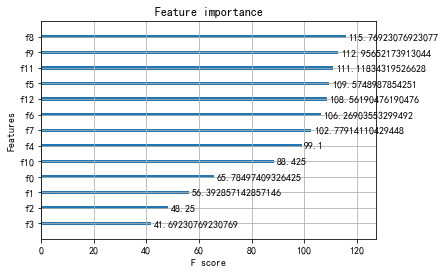

In [11]:
from xgboost import plot_importance  
from matplotlib import pyplot  
# 找出最重要的特征(一般很少用xgboost来获取特征的重要性)
plot_importance(bst,importance_type = 'cover')  
pyplot.show()